# Write a script that extracts the color palette from the screenshot of the given url.


In [95]:
from selenium import webdriver
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from collections import Counter


url = "https://cff2.earth.com/uploads/2017/12/18095245/10-of-the-world’s-most-colorful-animals-850x500.jpg" 
output_file = "image.png"


# Configure the browser driver (use Chrome in this example)
options = webdriver.ChromeOptions()
options.add_argument('--headless')  # Run the browser in headless mode (no GUI)
driver = webdriver.Chrome(options=options)

try:
# Open the URL in the browser
    driver.get(url)
    driver.implicitly_wait(10)

# do a screenshot and save it to the "image.png" output file
    driver.save_screenshot(output_file)
    print(f"Screenshot saved as '{output_file}'")
except Exception as e:
       print("An error happened:", e)
finally:
# Close the browser
    driver.quit()

Screenshot saved as 'image.png'


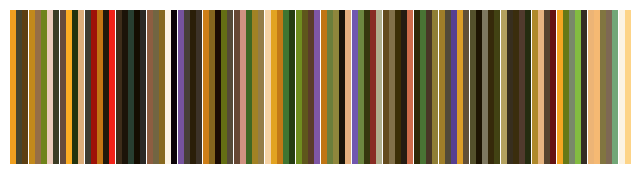

In [98]:
# image path and number of colors we want

image_path = '/Users/alissa/Desktop/task/image.png'
num_colors = 100


# Open the image
try:
    image = Image.open(image_path)
except FileNotFoundError:
    print("Error: The specified file was not found.")
    

# Convert the image to RGB mode (in case it's RGBA or another format)
mage = image.convert('RGB')

# Resize the image for faster processing (optional, can be removed for more accuracy)
image.thumbnail((280, 280))

# Flatten the image to a set of RGB tuples
pixels =  set(image.getdata())
    
# Count the occurrences of each color
color_count = Counter(pixels)

# Sort the colors based on their occurrences (from most to least frequent colors )
sorted_colors = sorted(color_count, key=color_count.get, reverse=True)

# Get the top 'num_colors' most frequent colors
top_colors = sorted_colors[:num_colors]

# Display the extracted color palette
plt.figure(figsize=(8, 2))
for i, color in enumerate(top_colors):
    plt.subplot(1, num_colors, i + 1)
    plt.imshow([[color]], extent=[0, 1, 0, 1], aspect='auto')
    plt.axis('off')
plt.show()